Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io
import warnings
warnings.filterwarnings('ignore')

Importing our dataset

In [2]:
file = scipy.io.loadmat('D:\DataAnalyst&InternshipProgramme\MyNotebooks\DataSets\DigitsData.mat')
type(file)

dict

Our data is in dictionary format , lets check it out

In [3]:
file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

Here header , version , and globals are none of our use 

In [4]:
print(file['y'].shape)
print(file['X'].shape)

(5000, 1)
(5000, 400)


This dataset have 5000 handwritten digits examples .

Taking necessary data with us

In [5]:
Y = file['y']
X = file['X']

Visualizing our Data

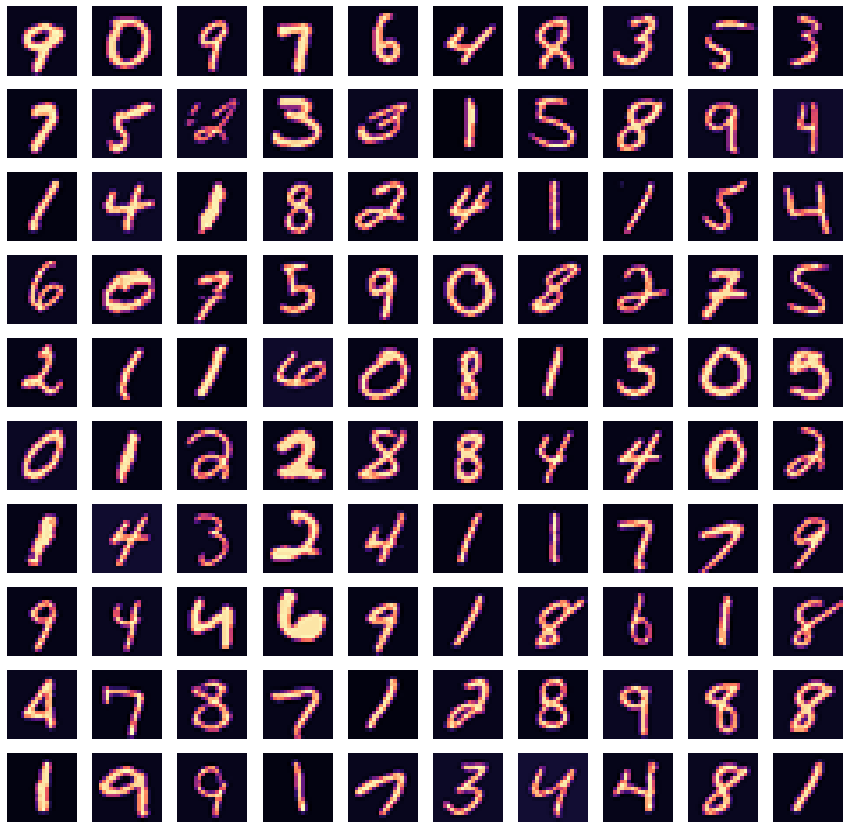

In [6]:
fig , axis = plt.subplots(10,10,figsize=(15,15))
for i in range(10):
    for j in range(10):
        idx = np.random.randint(0,5001)
        data=X[idx].reshape(20,20,order="F") #here order="F" is for upright image
        obj = axis[i,j].imshow(data,cmap='magma')
        axis[i,j].axis("off")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20,random_state=10)
print(Y_train.shape)
print(X_train.shape)

(4000, 1)
(4000, 400)


In [8]:
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression(max_iter=21,verbose=True,multi_class='ovr',)
LRModel.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


LogisticRegression(max_iter=21, multi_class='ovr', verbose=True)

In [9]:
from sklearn.metrics import accuracy_score
trainpredictions = LRModel.predict(X_train)
testpredictions = LRModel.predict(X_test)
testscore =accuracy_score(testpredictions, Y_test)
trainscore =accuracy_score(trainpredictions, Y_train)
print("Train Score : {}".format(trainscore*100))
print("Test Score : {}".format(testscore*100))

Train Score : 94.025
Test Score : 91.3


On testing data accuracy of our model is 91.3%  